# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [35]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


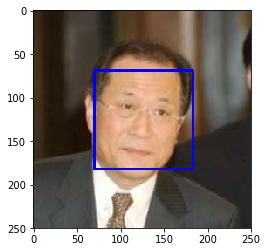

In [36]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[6])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [5]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [6]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
cnt_human = 0
cnt_dog = 0
# List to store humans detected in dog images 
dogWithHuman = []
for human, dog in zip(human_files_short, dog_files_short):
    if(face_detector(human) > 0):
        cnt_human += 1
    if(face_detector(dog) > 0):
        cnt_dog += 1
        dogWithHuman.append(dog)
print("Human faces detect {} % . Humans detected in dogs images {} % ".format(cnt_human, cnt_dog))

Human faces detect 98 % . Humans detected in dogs images 17 % 


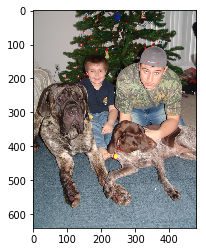

In [6]:
# display the image
# view image results
img = np.asarray(Image.open(dogWithHuman[2]))
plt.imshow(img)
plt.show()

We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [7]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [78]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [79]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
   
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    transform = transforms.Compose([transforms.Resize(256), 
                                    transforms.CenterCrop(244), 
                                    transforms.ToTensor(),
                                    transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])
    
   
    # Image loads picture from file 
    test_data = Image.open(img_path)
    # print(test_data.size) # see current size before tranform
    
    pil_to_tensor = transform(test_data)
    # print(pil_to_tensor.shape) # view size after transform
    
    pil_to_tensor.unsqueeze_(0)
    
     # move model to GPU if CUDA is available
    if use_cuda:
        pil_to_tensor = pil_to_tensor.cuda()
 
    VGG16.eval()
    output = VGG16(pil_to_tensor)
    
    # Get topindex probability
    # print( output.topk(1))
    
    return output.topk(1)

    

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [80]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    result = False
    _, label = VGG16_predict(img_path)
    if(label >= 151 and label <= 268):
        result = True
    return result # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [11]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
cnt_human = 0
cnt_dog = 0
for human, dog in zip(human_files_short, dog_files_short):
    if(dog_detector(human)):
        cnt_human += 1
    if(dog_detector(dog)):
        cnt_dog += 1
print("Human faces detected as dogs {} % . Dog detected {} % ".format(cnt_human, cnt_dog))


Human faces detected as dogs 0 % . Dog detected 100 % 


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [12]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

# define ResNet-50 model
inception = models.inception_v3(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    inception = inception.cuda()


Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.torch/models/inception_v3_google-1a9a5a14.pth
100%|██████████| 108857766/108857766 [00:01<00:00, 97937961.11it/s]


In [13]:
def inception_predict(img_path):
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    transform = transforms.Compose([transforms.Resize(299), 
                                    transforms.CenterCrop(299), 
                                    transforms.ToTensor(),
                                    transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])
    
    # Image loads picture from file 
    test_data = Image.open(img_path)
    # print(test_data.size) # see current size before tranform
    
    pil_to_tensor = transform(test_data)
    # print(pil_to_tensor.shape) # view size after transform
    
    pil_to_tensor.unsqueeze_(0)
    
     # move model to GPU if CUDA is available
    if use_cuda:
        pil_to_tensor = pil_to_tensor.cuda()
    
    inception.eval()
    output = inception(pil_to_tensor)
    
    # Get topindex probability
    # print( output.topk(1))
    
    return output.topk(1)


In [14]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector_inception(img_path):
    ## TODO: Complete the function.
    result = False
    _, label = inception_predict(img_path)
    if(label >= 151 and label <= 268):
        result = True
    return result # true/false

In [15]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
cnt_human = 0
cnt_dog = 0
for human, dog in zip(human_files_short, dog_files_short):
    if(dog_detector_inception(human)):
        cnt_human += 1
    if(dog_detector_inception(dog)):
        cnt_dog += 1
print("Human faces detected as dogs {} % . Dog detected {} % ".format(cnt_human, cnt_dog))

Human faces detected as dogs 1 % . Dog detected 100 % 


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [15]:
import os
from torchvision import datasets
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 64
# percentage of training set to use as validation and testing
test_valid_size = 0.4

# ,
# convert data to a normalized torch.FloatTensor
train_transform = transforms.Compose([transforms.Resize(224),
                                    transforms.CenterCrop(224),
                                    transforms.RandomRotation(30),
                                    transforms.RandomHorizontalFlip(),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5),
                                                           (0.5, 0.5, 0.5))])

test_transforms = transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5, 0.5, 0.5),
                                                           (0.5, 0.5, 0.5))])



### TODO: Write data loaders for training, validation, and test sets
data_dir = '/data/dog_images/'
train_data = datasets.ImageFolder(data_dir + 'train', transform=train_transform)
# print(train_data.classes) # view labels
valid_data = datasets.ImageFolder(data_dir + 'valid', transform=train_transform)
test_data = datasets.ImageFolder(data_dir + 'test', transform=test_transforms)


# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    shuffle=True, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, 
     shuffle=True, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
     num_workers=num_workers)



### Visualize a Batch of Training Data

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

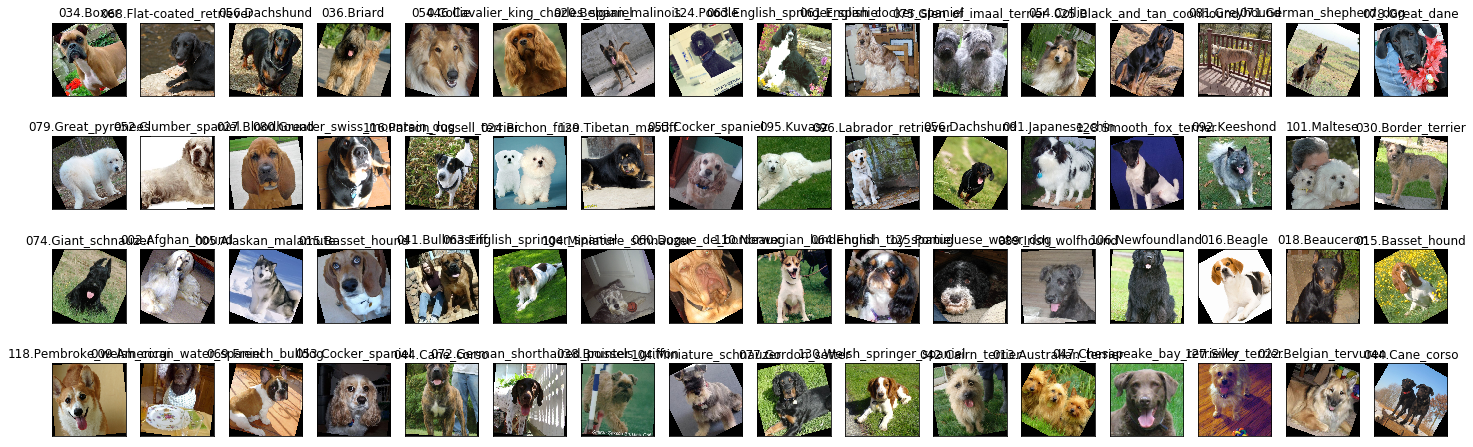

In [18]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 8))
# display 36 images
for idx in np.arange(batch_size):
    ax = fig.add_subplot(4, batch_size/4, idx+1, xticks=[], yticks=[]) # Divide batch 36 by value 4 = 9 (Display 9col)
    imshow(images[idx])
    ax.set_title(train_data.classes[labels[idx]]) # View names classes

In [19]:
loaders_scratch = {'test': test_loader,
          'valid': valid_loader,
          'train': train_loader}

**Question 3:** Describe your chosen procedure for preprocessing the data.
    
>Answer
- Images from dog_images/train for training dataset with a train transform(Augmented) applied  
- Images from dog_images/valid for valdation dataset with a train transform(Augmented)  applied  
- Images from dog_images/test for testing dataset with a test transform applied  
    
**Question**:
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?

>Answer
- I applied transform for resize 224 to scale down images because images had random sizes all bigger than 256 so as to have 
a uniform size that we can work with as a tensor
- I applied transform center crop 224 
    
**Question**:
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

>Answer
- I decided to agument dataset by using random rotation 30deg and random horizontal flip 
so that this CNN can be rotation, translation and scale invariance


### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [20]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 16, 4, stride=1, padding=2)
        self.bnorm1 = nn.BatchNorm2d(16)
        
        self.conv2 = nn.Conv2d(16, 32, 4, stride=1, padding=2)
        self.bnorm2 = nn.BatchNorm2d(32)
        
        self.conv3 = nn.Conv2d(32, 64, 4, stride=1, padding=2)
        self.bnorm3 = nn.BatchNorm2d(64)
        
        self.conv4 = nn.Conv2d(64, 128, 4, stride=1, padding=2)
        self.bnorm4 = nn.BatchNorm2d(128)
        
        self.conv5 = nn.Conv2d(128, 256, 4, stride=1, padding=2)
        self.bnorm5 = nn.BatchNorm2d(256)
        
       
        self.pool = nn.MaxPool2d(2,2)
        self.dropout = nn.Dropout(0.5)
        
        #Expected image size =7
        self.avgpool =  nn.AvgPool2d(7)
        
        self.bnorm6 = nn.BatchNorm1d(256)
        
        self.fc1 = nn.Linear(256, 256)
        
        self.fc2 = nn.Linear(256, 133)


    
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.relu(self.bnorm1(self.conv1(x))))
        #print(x.shape)
        x = self.pool(F.relu(self.bnorm2(self.conv2(x))))
        #print(x.shape)
        x = self.pool(F.relu(self.bnorm3(self.conv3(x))))
        #print(x.shape)
        x = self.pool(F.relu(self.bnorm4(self.conv4(x))))
        #print(x.shape)
        x = self.pool(F.relu(self.bnorm5(self.conv5(x))))
        #print(x.shape)
        
        # Linear
        #print('Linear layer')
        x = self.avgpool(x)
        x = x.view(-1, 256)
        #print(x.shape)
        x = F.relu(self.bnorm6(self.fc1(x)))
        #print(x.shape)
        x = self.dropout(x)
        #print('Drop out')
        #print(x.shape)
        x = F.relu(self.fc2(x))
        #print(x.shape)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
- I tried to copy alittle bit of the VGG16 architecture. 5 Convolutional layer and 2 fully connected layer then i added batch normalization to help reduce internal covariance across each layer then trained for 50 epochs and this increased my result from 15% to 48%

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [21]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.09)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [26]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            #train_loss += loss.item() * data.size(0)
            

            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss += loss.item()*data.size(0)
            
        # calculate average losses
        #train_loss = train_loss/len(loaders['train'].dataset)
        #valid_loss = valid_loss/len(loaders['valid'].dataset)
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss

    # return trained model
    return model


# train the model
model_scratch = train(50, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 1.507894 	Validation Loss: 3119.931980
Validation loss decreased (inf --> 3119.931980).  Saving model ...
Epoch: 2 	Training Loss: 1.499713 	Validation Loss: 3755.477309
Epoch: 3 	Training Loss: 1.431157 	Validation Loss: 2975.767241
Validation loss decreased (3119.931980 --> 2975.767241).  Saving model ...
Epoch: 4 	Training Loss: 1.408908 	Validation Loss: 2738.598965
Validation loss decreased (2975.767241 --> 2738.598965).  Saving model ...
Epoch: 5 	Training Loss: 1.364261 	Validation Loss: 3833.915145
Epoch: 6 	Training Loss: 1.292663 	Validation Loss: 3347.870452
Epoch: 7 	Training Loss: 1.277214 	Validation Loss: 2937.289521
Epoch: 8 	Training Loss: 1.225310 	Validation Loss: 2847.676403
Epoch: 9 	Training Loss: 1.178157 	Validation Loss: 2554.378058
Validation loss decreased (2738.598965 --> 2554.378058).  Saving model ...
Epoch: 10 	Training Loss: 1.198118 	Validation Loss: 2993.333569
Epoch: 11 	Training Loss: 1.114737 	Validation Loss: 2918.070353
Ep

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [28]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.112815


Test Accuracy: 48% (406/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [17]:
## TODO: Specify data loaders

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 64

transform_train_transfer = transforms.Compose([transforms.Resize(256), 
                                    transforms.CenterCrop(224), 
                                    transforms.RandomRotation(30),
                                    transforms.RandomHorizontalFlip(),
                                    transforms.ToTensor(),
                                    transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

transform_test_transfer  = transforms.Compose([transforms.Resize(256), 
                                    transforms.CenterCrop(224), 
                                    transforms.ToTensor(),
                                    transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])





### TODO: Write data loaders for training, validation, and test sets
data_dir = '/data/dog_images/'
train_data_transfer = datasets.ImageFolder(data_dir + 'train', transform=transform_train_transfer)
# print(train_data.classes) # view labels
valid_data_transfer = datasets.ImageFolder(data_dir + 'valid', transform=transform_train_transfer)
test_data_transfer = datasets.ImageFolder(data_dir + 'test', transform=transform_test_transfer)


# prepare data loaders 
train_loader_transfer = torch.utils.data.DataLoader(train_data_transfer, batch_size=batch_size,
    shuffle=True, num_workers=num_workers)
valid_loader_transfer = torch.utils.data.DataLoader(valid_data_transfer, batch_size=batch_size, 
     shuffle=True, num_workers=num_workers)
test_loader_transfer = torch.utils.data.DataLoader(test_data_transfer, batch_size=batch_size, 
     num_workers=num_workers)


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [18]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.vgg16(pretrained=True)


In [19]:
# Freeze parameters
for param in model_transfer.parameters():
    param.requires_grad = False
    
# Here we get input from previous layer before last
n_inputs = model_transfer.classifier[6].in_features

# number of classes
n_class = 133

last_layer = nn.Linear(n_inputs, n_class)
    
model_transfer.classifier[6] = last_layer
print(model_transfer.classifier)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

if use_cuda:
    model_transfer = model_transfer.cuda()

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace)
  (2): Dropout(p=0.5)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace)
  (5): Dropout(p=0.5)
  (6): Linear(in_features=4096, out_features=133, bias=True)
)


In [20]:
loaders_transfer = {'test': test_loader_transfer,
          'valid': valid_loader_transfer,
          'train': train_loader_transfer}

In [21]:
data_transfer = {'test': test_data_transfer,
          'valid': valid_data_transfer,
          'train': train_data_transfer}

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
- From the lession i learnt in DPL transfer learning if data set is small and similar to original training dataset
slice off the end of neural network. I sliced off last linear layer of trained model taking output from classification layer 5
as input in classification layer 6 and output the number of my expected labels
- Freezed all weights expect classification layer 6 trained model and this worked really well.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [33]:
criterion_transfer = nn.CrossEntropyLoss()
# Only train the classifier[6] others are frozen
optimizer_transfer = optim.SGD(model_transfer.classifier[6].parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [34]:
# train the model
model_transfer = train(20, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 4.816580 	Validation Loss: 3704.646617
Validation loss decreased (inf --> 3704.646617).  Saving model ...
Epoch: 2 	Training Loss: 4.288947 	Validation Loss: 3321.439954
Validation loss decreased (3704.646617 --> 3321.439954).  Saving model ...
Epoch: 3 	Training Loss: 3.833229 	Validation Loss: 2988.783607
Validation loss decreased (3321.439954 --> 2988.783607).  Saving model ...
Epoch: 4 	Training Loss: 3.437868 	Validation Loss: 2727.652944
Validation loss decreased (2988.783607 --> 2727.652944).  Saving model ...
Epoch: 5 	Training Loss: 3.140920 	Validation Loss: 2453.851187
Validation loss decreased (2727.652944 --> 2453.851187).  Saving model ...
Epoch: 6 	Training Loss: 2.864848 	Validation Loss: 2270.482709
Validation loss decreased (2453.851187 --> 2270.482709).  Saving model ...
Epoch: 7 	Training Loss: 2.642061 	Validation Loss: 2102.883280
Validation loss decreased (2270.482709 --> 2102.883280).  Saving model ...
Epoch: 8 	Training Loss: 2.450077 	

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [35]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.133938


Test Accuracy: 77% (645/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [86]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
     
    # Image loads picture from file 
    test_data = Image.open(img_path)
   
    #Data to tensor
    pil_to_tensor = test_transforms(test_data)

    pil_to_tensor.unsqueeze_(0)
    
     # move model to GPU if CUDA is available
    if use_cuda:
        pil_to_tensor = pil_to_tensor.cuda()
        
    #Load model
    model_transfer.load_state_dict(torch.load('../dog_project/model_transfer.pt', map_location=lambda storage, loc: storage))
 
    # load model
    model_transfer.eval()
    # Make prediction 
    output = model_transfer(pil_to_tensor)
    _, label = output.topk(1)
    return class_names[label]

In [100]:
#Test Method on dogs
index = 67
print(dog_files[index])
predict_breed_transfer(dog_files[index])

/data/dog_images/train/059.Doberman_pinscher/Doberman_pinscher_04193.jpg


'Doberman pinscher'

In [94]:
#Test Method method on humans
index = 50
print(human_files[index])
predict_breed_transfer(human_files[index])

/data/lfw/Julianne_Moore/Julianne_Moore_0003.jpg


'German wirehaired pointer'

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [95]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    title = None
    data_info = None
    dog_breed = None
    dog_human_breed = None
    
    ## handle cases for a human face, dog, and neither
    human_cnt = face_detector(img_path)
    has_dog = dog_detector(img_path)
    
    if(human_cnt == 0 and has_dog == False):
        title = "Error image doesn't have human or dog"
        data_info = "Please provide images with dogs and humans" 
    elif(has_dog and human_cnt > 0):
        dog_breed = predict_breed_transfer(img_path)
        title = "Hello human, Hello doggy"
        data_info = "Your dog breed is {} ".format(dog_breed)
    elif(human_cnt > 0):
        dog_human_breed = predict_breed_transfer(img_path)
        title = "Hello human"
        data_info = "You look like a {} ".format(dog_human_breed)
    elif(has_dog):
        dog_breed = predict_breed_transfer(img_path)
        title = "Hello dog"
        data_info = "Your dog breed is {} ".format(dog_breed)
    
    #Show image
    img = np.asarray(Image.open(img_path))
    plt.title(title)
    plt.imshow(img)
    plt.show()
    print(data_info)

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)
- Output is as expected
- **Improvements**
- Preprocess images so that the dog will always be at the center of image 
- Increase training dataset, validation and testing
- Add popular mixed breeds of to datasets

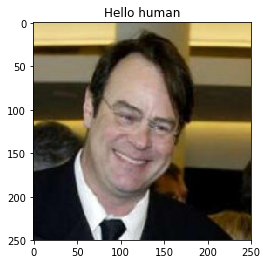

You look like a German wirehaired pointer 


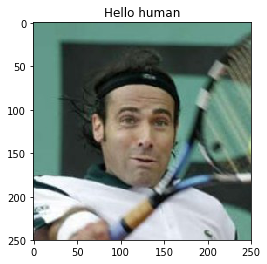

You look like a Bearded collie 


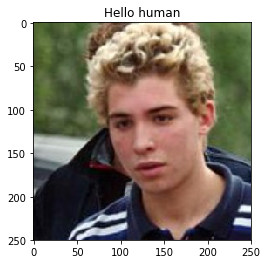

You look like a English cocker spaniel 


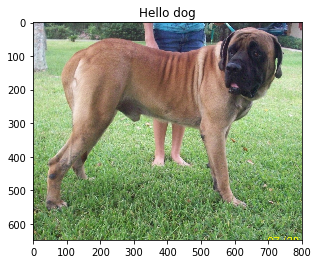

Your dog breed is Bullmastiff 


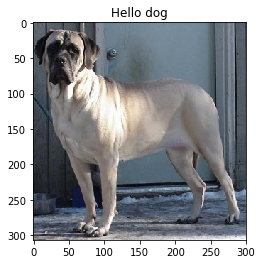

Your dog breed is Mastiff 


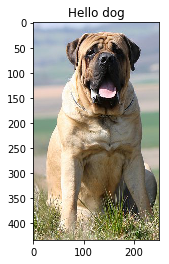

Your dog breed is Mastiff 


In [96]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

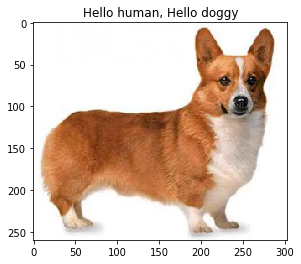

Your dog breed is Pembroke welsh corgi 


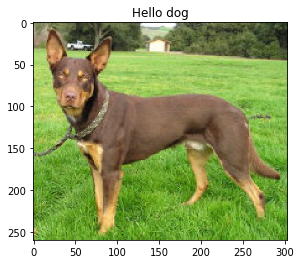

Your dog breed is Pharaoh hound 


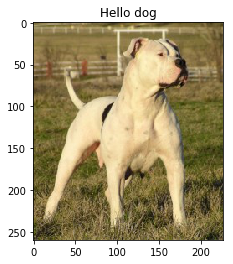

Your dog breed is Bull terrier 


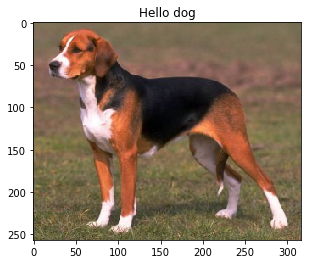

Your dog breed is American foxhound 


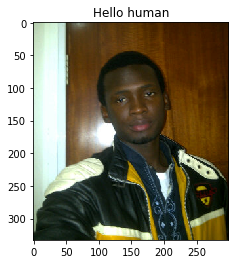

You look like a Pharaoh hound 


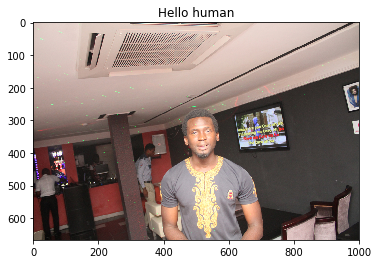

You look like a Dachshund 


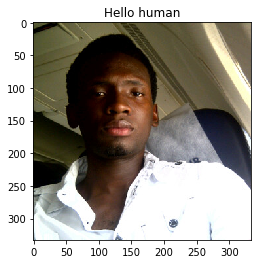

You look like a Dogue de bordeaux 


In [101]:
# load filenames my files from test folder and test it out
my_files = np.array(glob("../dog_project/test/*"))
for file in my_files:
    run_app(file)